In [36]:
from sklearn.datasets import load_iris
import networkx as nx
import matplotlib.pyplot as plt
iris = load_iris()
X = iris.data  # Features
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [37]:
from sklearn.metrics import pairwise_distances
import numpy as np

similarity_matrix = pairwise_distances(X, metric='euclidean')


In [38]:
threshold = 2.0  # Adjust the threshold based on your data
adjacency_matrix = np.where(similarity_matrix < threshold, 1, 0)


In [39]:
degree_matrix = np.diag(np.sum(adjacency_matrix, axis=1))


In [40]:
laplacian_matrix = degree_matrix - adjacency_matrix
laplacian_matrix

array([[49, -1, -1, ...,  0,  0,  0],
       [-1, 50, -1, ...,  0,  0,  0],
       [-1, -1, 49, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 89, -1, -1],
       [ 0,  0,  0, ..., -1, 80, -1],
       [ 0,  0,  0, ..., -1, -1, 89]])

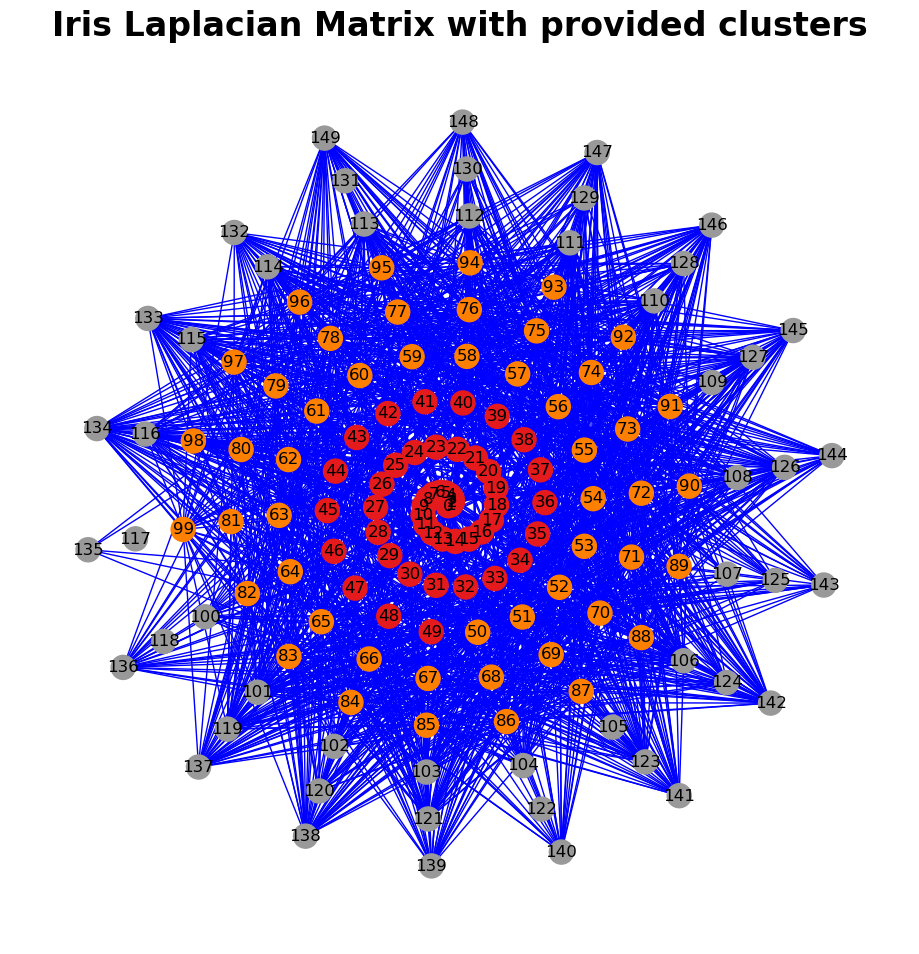

In [41]:
# Construct the degree matrix
labels = iris.target
degree_matrix = np.diag(np.sum(adjacency_matrix, axis=1))

# Construct the Laplacian matrix
laplacian_matrix = degree_matrix - adjacency_matrix

# Create a graph using NetworkX
G = nx.Graph()

# Add nodes with their respective labels
for i in range(len(labels)):
    G.add_node(i, label=labels[i])

# Add edges between nodes of different groups
for i in range(len(labels)):
    for j in range(i + 1, len(labels)):
        if labels[i] != labels[j] and adjacency_matrix[i, j] == 1:
            G.add_edge(i, j)

# Plot the graph
pos = nx.spiral_layout(G)  # You can use other layout algorithms as well
node_colors = [label for _, label in G.nodes(data='label')]
edge_colors = ['blue' for _, _, color in G.edges(data='color')]
plt.figure(figsize=(9, 9))
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, cmap=plt.cm.Set1, font_color='black')
plt.title("Iris Laplacian Matrix with provided clusters", size=24, weight='bold')
plt.show()

In [42]:
np.linalg.eig(laplacian_matrix)[0][1]

0.5045268008592614

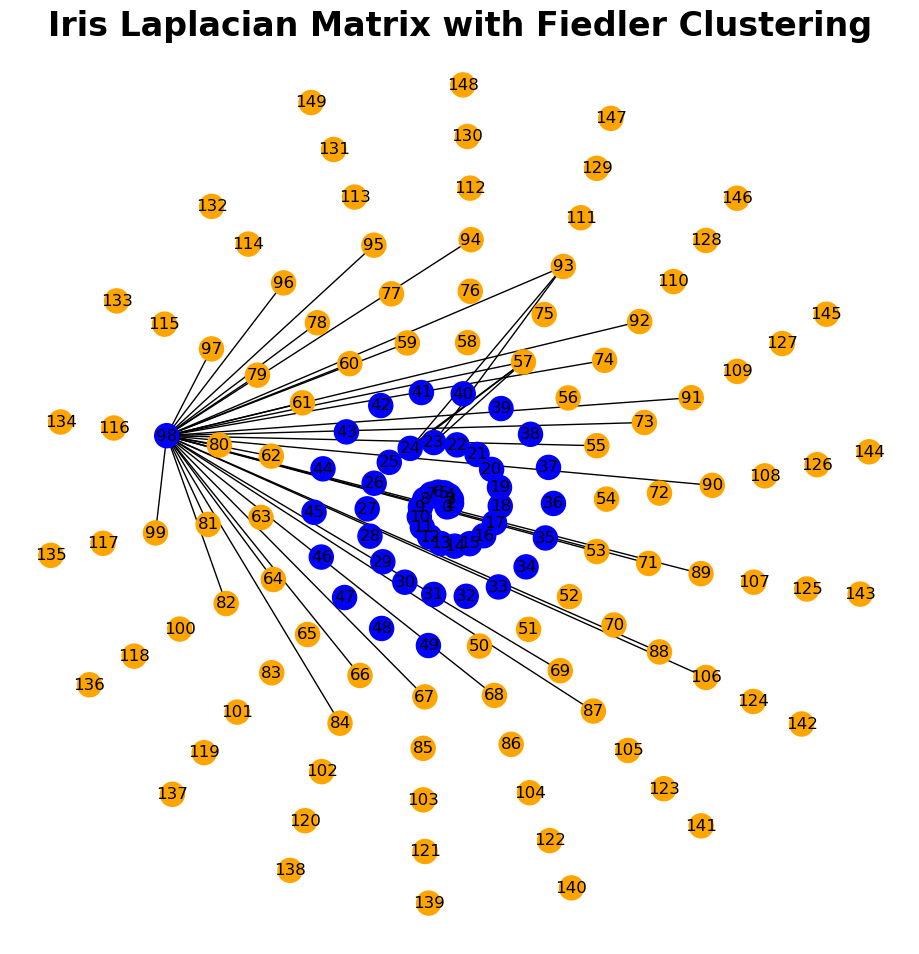

In [43]:

labels = [0 if np.linalg.eig(laplacian_matrix)[1][:, 1][i] < 0 else 1 for i in range(len(labels))]
# Create a graph using NetworkX
G = nx.Graph()

# Add nodes with their respective labels
for i in range(len(labels)):
    G.add_node(i, label=labels[i])

# Add edges between nodes of different groups
for i in range(len(labels)):
    for j in range(i + 1, len(labels)):
        if labels[i] != labels[j] and adjacency_matrix[i, j] == 1:
            G.add_edge(i, j)

# Plot the graph
pos = nx.spiral_layout(G)
node_colors = ['blue' if label == 0 else 'orange' for label in labels]
edge_colors = ['black' for _, _, color in G.edges(data='color')]

plt.figure(figsize=(9, 9))
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, cmap=plt.cm.Set1, font_color='black')
plt.title("Iris Laplacian Matrix with Fiedler Clustering", size=24, weight='bold')
plt.show()


In [44]:
type(laplacian_matrix)

numpy.ndarray

In [45]:
import numpy as np
adjacency_matrix_50x50 = np.where(similarity_matrix < threshold, 1, 0)[:50, :50]
degree_matrix_50x50 = np.diag(np.sum(adjacency_matrix, axis=1))[:50, :50]

# Assuming laplacian_matrix is a 150x150 ndarray
laplacian_matrix_50x50 = laplacian_matrix[:50, :50]
laplacian_matrix_50x50

array([[49, -1, -1, ..., -1, -1, -1],
       [-1, 50, -1, ..., -1, -1, -1],
       [-1, -1, 49, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., 49, -1, -1],
       [-1, -1, -1, ..., -1, 49, -1],
       [-1, -1, -1, ..., -1, -1, 49]])

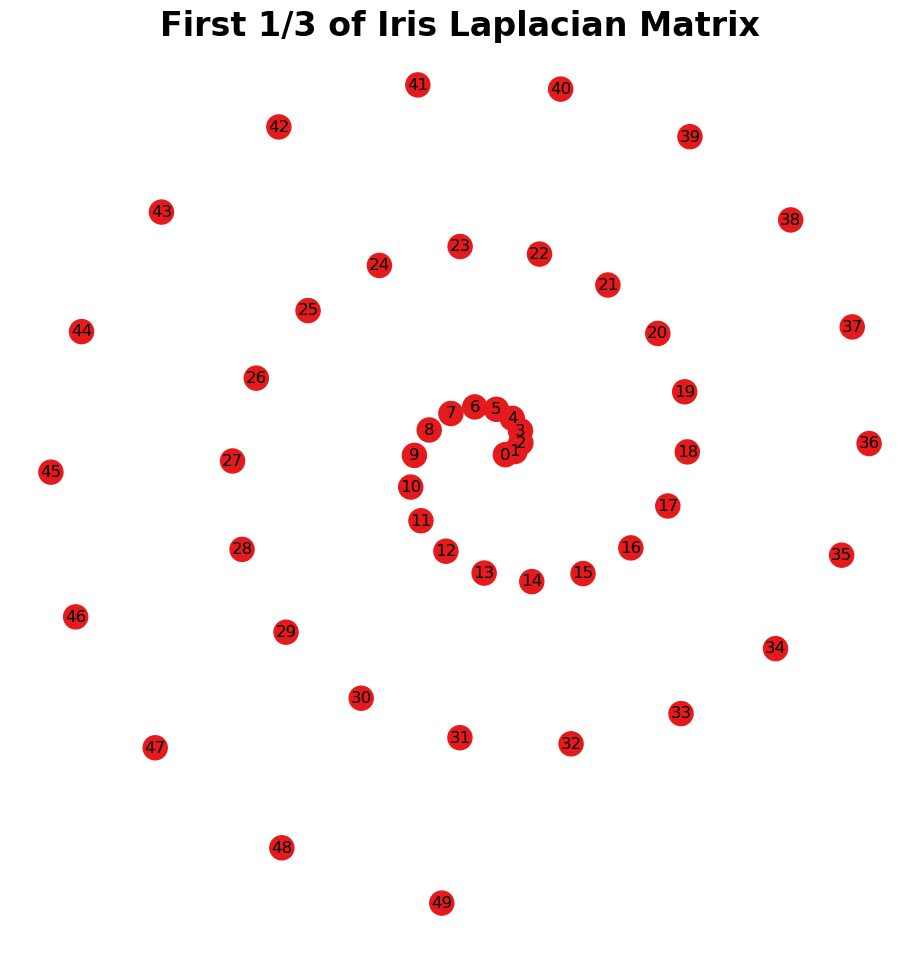

In [49]:
# Add nodes with their respective labels
labels = iris.target[:50]
G = nx.Graph()
for i in range(len(labels)):
    G.add_node(i, label=labels[i])

# Add edges between nodes of different groups
for i in range(len(labels)):
    for j in range(i + 1, len(labels)):
        if labels[i] != labels[j] and adjacency_matrix_50x50[i, j] == 1:
            G.add_edge(i, j)

# Plot the graph
pos = nx.spiral_layout(G)  # You can use other layout algorithms as well
node_colors = [label for _, label in G.nodes(data='label')]
edge_colors = ['black' for _, _, color in G.edges(data='color')]
plt.figure(figsize=(9, 9))
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, cmap=plt.cm.Set1, font_color='black')
plt.title("First 1/3 of Iris Laplacian Matrix", size=24, weight='bold')
plt.show()

In [47]:
np.linalg.eig(laplacian_matrix_50x50)[0][1]

46.407074966787505

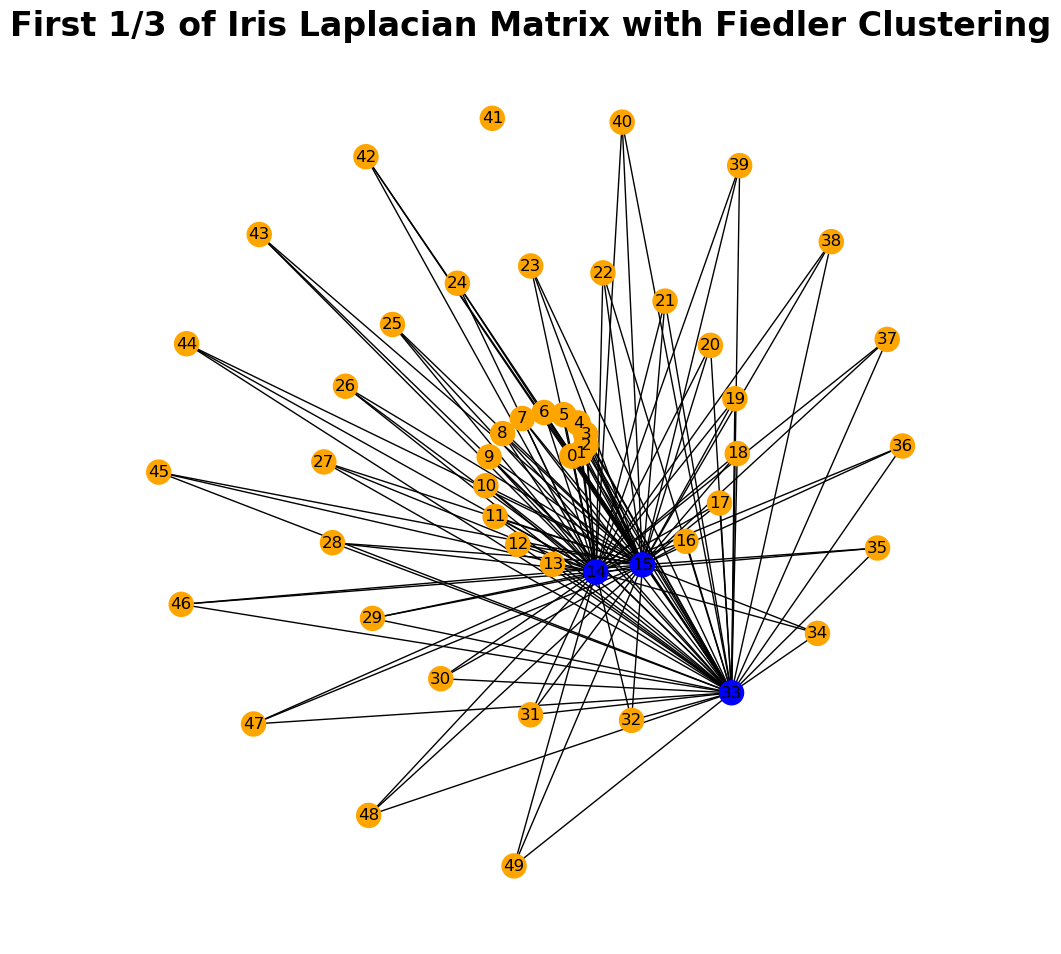

In [48]:
labels = [0 if np.linalg.eig(laplacian_matrix_50x50)[1][:, 1][i] < 0 else 1 for i in range(len(labels))]
# Create a graph using NetworkX
G = nx.Graph()

# Add nodes with their respective labels
for i in range(len(labels)):
    G.add_node(i, label=labels[i])

# Add edges between nodes of different groups
for i in range(len(labels)):
    for j in range(i + 1, len(labels)):
        if labels[i] != labels[j] and adjacency_matrix_50x50[i, j] == 1:
            G.add_edge(i, j)

# Plot the graph
pos = nx.spiral_layout(G)
node_colors = ['blue' if label == 0 else 'orange' for label in labels]
edge_colors = ['black' for _, _, color in G.edges(data='color')]

plt.figure(figsize=(9, 9))
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, cmap=plt.cm.Set1, font_color='black')
plt.title("First 1/3 of Iris Laplacian Matrix with Fiedler Clustering", size=24, weight='bold')
plt.show()